In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df1 = pd.read_csv("/kaggle/input/trkiye-2020-hava-kalitesiturkey-2020-air-quality/PM10.csv")
df2 = pd.read_csv("/kaggle/input/trkiye-2020-hava-kalitesiturkey-2020-air-quality/SO2.csv")
df3 = pd.read_csv("/kaggle/input/trkiye-2020-hava-kalitesiturkey-2020-air-quality/CO.csv")
df4 = pd.read_csv("/kaggle/input/trkiye-2020-hava-kalitesiturkey-2020-air-quality/NO2.csv")
df5 = pd.read_csv("/kaggle/input/trkiye-2020-hava-kalitesiturkey-2020-air-quality/O3.csv")
df6 = pd.read_csv("/kaggle/input/trkiye-2020-hava-kalitesiturkey-2020-air-quality/Full.csv")

<a id = "0"></a><br>
<font color = "blue">
İçerik:
    
1. [Giriş](#0)
1. [Değerler İle İlgili Bilgiler](#13)
1. [Şehirlere Göre PM10 Oranı (Values)](#1)
1. [Şehirlere Göre PM10 Oranı (İndex)](#2)
1. [Şehirlere Göre SO2 Oranı (Values)](#3)
1. [Şehirlere Göre SO2 Oranı (İndex)](#4)
1. [Şehirlere Göre CO Oranı (Values)](#5)
1. [Şehirlere Göre CO Oranı (İndex)](#6)
1. [Şehirlere Göre NO2 Oranı (Values)](#7)
1. [Şehirlere Göre NO2 Oranı (İndex)](#8)
1. [Şehirlere Göre O3 Oranı (Values)](#9)
1. [Şehirlere Göre O3 Oranı (İndex)](#10)
1. [Şehirlere Göre SO2 Oranı VS Şehirlere Göre PM10 Oranı](#11)
1. [Türkiye Hava Kalitesi (Tüm Değerler)](#12)

<a id = "0"></a><br>
# Giriş

Partiküler Madde (PM10-PM2.5): hava
içinde askıda bulunan partiküllerin
çeşitli ve kompleks karışımını içerir.
Partiküler madde doğal ve antropojenik
faaliyetler sonucu oluşur (Poschl,2005).
Partiküler maddenin esas kaynakları
fabrikalar, enerji tesisleri, yakma
tesisleri, inşaat faaliyetleri, yangınlar ve
rüzgârdır. Partiküllerin boyutu
aerodinamik çapları 2,5 µm’den küçük
olanlar PM2,5 ve 10 µm’den küçük
olanlar PM10 olarak tanımlanmaktadır.
Bu partiküller solunum sisteminde
depolanabilirler.

Kükürt Dioksit (SO2) : Ana kaynağı kükürt oranı yüksek
yağların, kömür ve linyitin yakılmasıdır. SO2 ayrıca
kükürt oranı yüksek bronz ve tunçun eritilmesiyle
ortaya çıkıyor. SO2 parametresi sırası ile ısınma, sanayi
ve trafik bölgeleri ile oluşan bir kirleticidir.

Karbonmonoksit (CO): Renksiz, kokusuz, ve tatsız bir
gaz olup karbon içeren yakıtların eksik yanması ile
ortaya çıkar. Birincil bir hava kirletici olan
karbonmonoksit, oksijen eksikliği, tutuşma sıcaklığı,
yüksek sıcaklıkta gazın kalıcılık zamanı ve yanma odası
türbülansı gibi etkenlerden birinin eksikliğinde tam
olmayan bir yanma sonucunda CO2 yerine meydana
gelmektedir.

Azot Dioksit (NO2): kırmızımsı kahverengi ve zehirli bir gazdır. Keskin bir kokuya sahip olan bu gazın kokusu klor gazına benzemektedir. Bu gaz N2O4 şeklinde gaz haline gelmektedir. Yaklaşık olarak 200 °C sıcaklıkta NO2 gazı NO ve O2 gazlarına parçalanmaktadır. Bunun yanında suda çok iyi çözülmektedir ve keskin, öksürüğe yol açan bir kokusu vardır.

Ozon (O3) : Yer seviyesi ozon (troposferik) kirliliği
atmosfere doğrudan salınmamaktadır. Güneş ışığının
etkisiyle, atmosfere salınan azot oksitler ve uçucu
organiklerin karmaşık kimyasal tepkimeleri neticesinde
oluşmaktadır. Bu sebeple azot oksit ve uçucu organik
kirleticileri ozon öncül kirleticiler olarak da
tanımlanmaktadır. Azot oksitler ve uçucu organik
kirleticilerinin temel kaynakları olan trafik, çözücü
kullanımı ve sanayi tesisleri dolaylı olarak yer seviyesi
ozon kirliliğine yol açmaktadır.

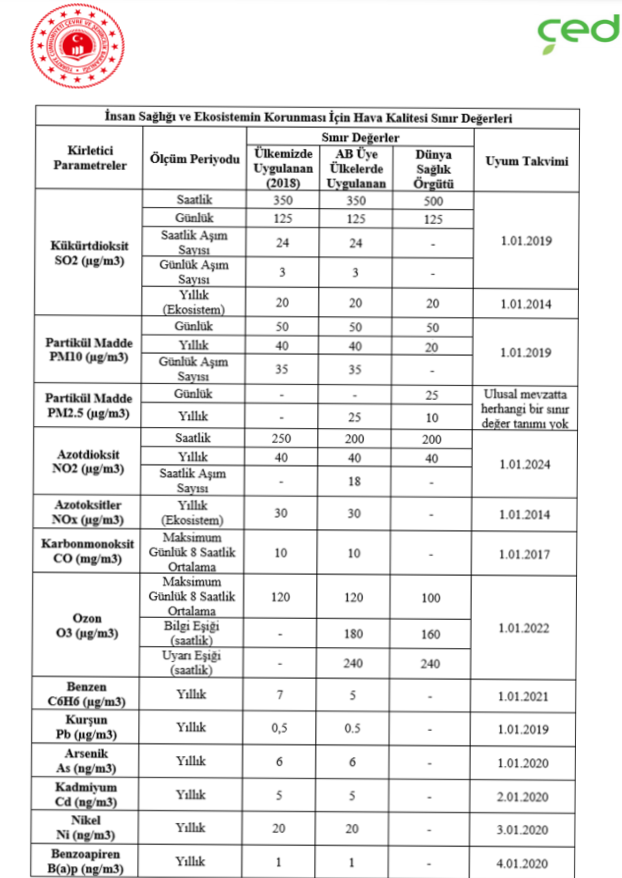

---
<a id = "13"></a><br>
### Değerler İle İlgili Bilgiler

In [ ]:
df6.describe()

In [ ]:
df1.info()

In [ ]:
df2.info()

In [ ]:
df3.info()

In [ ]:
df4.info()

In [ ]:
df5.info()

---

<a id = "1"></a><br>
### Şehirlere Göre PM10 Oranı (Values)

[İçerik Ekranına Gitmek İçin Tıklayın](#0)

In [ ]:
df1.PM10.replace(['-'],0.0,inplace = True)
df1.PM10 = df1.PM10.astype(float)
area_list = list(df1['Şehir'].unique())
area_PM10_ratio = []
for i in area_list:
    x = df1[df1['Şehir']==i]
    area_PM10_rate = sum(x.PM10)/len(x)
    area_PM10_ratio.append(area_PM10_rate)
data = pd.DataFrame({'area_list': area_list,'area_PM10_ratio':area_PM10_ratio})
new_index = (data['area_PM10_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

# visualization
plt.figure(figsize=(15,6))
sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_PM10_ratio'],palette = sns.cubehelix_palette(len(sorted_data)))
plt.xticks(rotation= 90)
plt.xlabel('Şehirler',color="green")
plt.ylabel('PM10 Oranı',color="red")
plt.title('Şehirlere Göre PM10 Oranı',color="blue")
plt.show()

<a id = "2"></a><br>
### Şehirlere Göre PM10 Oranı (İndex)

[İçerik Ekranına Gitmek İçin Tıklayın](#0)

In [ ]:
df1.PM10.replace(['-'],"0.0",inplace = True)
df1.PM10 = df1.PM10.astype(float)
area_list = list(df1['Şehir'].unique())
area_PM10_ratio = []
for i in area_list:
    x = df1[df1['Şehir']==i]
    area_PM10_rate = sum(x.PM10)/len(x)
    area_PM10_ratio.append(area_PM10_rate)
data = pd.DataFrame({'area_list': area_list,'area_PM10_ratio':area_PM10_ratio})
new_index = (data['area_PM10_ratio'].sort_index(ascending=False)).index.values
sorted_data = data.reindex(new_index)

# visualization
plt.figure(figsize=(15,6))
sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_PM10_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('Şehirler',color="green")
plt.ylabel('PM10 Oranı',color="red")
plt.title('Şehirlere Göre PM10 Oranı',color="blue")
plt.show()

---

<a id = "3"></a><br>
### Şehirlere Göre SO2 Oranı (Values)

[İçerik Ekranına Gitmek İçin Tıklayın](#0)

In [ ]:
df2.SO2.replace(['-'],0.0,inplace = True)
df2.SO2 = df2.SO2.astype(float)
area_list = list(df2['Şehir'].unique())
area_SO2_ratio = []
for i in area_list:
    x = df2[df2['Şehir']==i]
    area_SO2_rate = sum(x.SO2)/len(x)
    area_SO2_ratio.append(area_SO2_rate)
data = pd.DataFrame({'area_list': area_list,'area_SO2_ratio':area_SO2_ratio})
new_index = (data['area_SO2_ratio'].sort_values(ascending=False)).index.values
sorted_data2 = data.reindex(new_index)

# visualization
plt.figure(figsize=(15,6))
sns.barplot(x=sorted_data2['area_list'], y=sorted_data2['area_SO2_ratio'],palette = sns.cubehelix_palette(len(sorted_data2)))
plt.xticks(rotation= 90)
plt.xlabel('Şehirler',color="green")
plt.ylabel('SO2 Oranı',color="red")
plt.title('Şehirlere Göre SO2 Oranı',color="blue")
plt.show()

<a id = "4"></a><br>
### Şehirlere Göre SO2 Oranı (İndex)

[İçerik Ekranına Gitmek İçin Tıklayın](#0)

In [ ]:
df2.SO2.replace(['-'],"0.0",inplace = True)
df2.SO2 = df2.SO2.astype(float)
area_list = list(df2['Şehir'].unique())
area_SO2_ratio = []
for i in area_list:
    x = df2[df2['Şehir']==i]
    area_SO2_rate = sum(x.SO2)/len(x)
    area_SO2_ratio.append(area_SO2_rate)
data = pd.DataFrame({'area_list': area_list,'area_SO2_ratio':area_SO2_ratio})
new_index = (data['area_SO2_ratio'].sort_index(ascending=False)).index.values
sorted_dataA = data.reindex(new_index)

# visualization
plt.figure(figsize=(15,6))
sns.barplot(x=sorted_dataA['area_list'], y=sorted_dataA['area_SO2_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('Şehirler',color="green")
plt.ylabel('SO2 Oranı',color="red")
plt.title('Şehirlere Göre SO2 Oranı',color="blue")
plt.show()

---

<a id = "5"></a><br>
### Şehirlere Göre CO Oranı (Values)

[İçerik Ekranına Gitmek İçin Tıklayın](#0)

In [ ]:
df3.CO.replace(['-'],0.0,inplace = True)
df3.CO = df3.CO.astype(float)
area_list = list(df3['Şehir'].unique())
area_CO_ratio = []
for i in area_list:
    x = df3[df3['Şehir']==i]
    area_CO_rate = sum(x.CO)/len(x)
    area_CO_ratio.append(area_CO_rate)
data = pd.DataFrame({'area_list': area_list,'area_CO_ratio':area_CO_ratio})
new_index = (data['area_CO_ratio'].sort_values(ascending=False)).index.values
sorted_data3 = data.reindex(new_index)

# visualization
plt.figure(figsize=(15,6))
sns.barplot(x=sorted_data3['area_list'], y=sorted_data3['area_CO_ratio'],palette = sns.cubehelix_palette(len(sorted_data3)))
plt.xticks(rotation= 90)
plt.xlabel('Şehirler',color="green")
plt.ylabel('CO Oranı',color="red")
plt.title('Şehirlere Göre CO Oranı',color="blue")
plt.show()

<a id = "6"></a><br>
### Şehirlere Göre CO Oranı (İndex)

[İçerik Ekranına Gitmek İçin Tıklayın](#0)

In [ ]:
df3.CO.replace(['-'],"0.0",inplace = True)
df3.CO = df3.CO.astype(float)
area_list = list(df3['Şehir'].unique())
area_CO_ratio = []
for i in area_list:
    x = df3[df3['Şehir']==i]
    area_CO_rate = sum(x.CO)/len(x)
    area_CO_ratio.append(area_CO_rate)
data = pd.DataFrame({'area_list': area_list,'area_CO_ratio':area_CO_ratio})
new_index = (data['area_CO_ratio'].sort_index(ascending=False)).index.values
sorted_dataAA = data.reindex(new_index)

# visualization
plt.figure(figsize=(15,6))
sns.barplot(x=sorted_dataAA['area_list'], y=sorted_dataAA['area_CO_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('Şehirler',color="green")
plt.ylabel('CO Oranı',color="red")
plt.title('Şehirlere Göre CO Oranı',color="blue")
plt.show()

---

<a id = "7"></a><br>
### Şehirlere Göre NO2 Oranı (Values)

[İçerik Ekranına Gitmek İçin Tıklayın](#0)

In [ ]:
df4.NO2.replace(['-'],"0.0",inplace = True)
df4.NO2 = df4.NO2.astype(float)
area_list = list(df4['Şehir'].unique())
area_NO2_ratio = []
for i in area_list:
    x = df4[df4['Şehir']==i]
    area_NO2_rate = sum(x.NO2)/len(x)
    area_NO2_ratio.append(area_NO2_rate)
data = pd.DataFrame({'area_list': area_list,'area_NO2_ratio':area_NO2_ratio})
new_index = (data['area_NO2_ratio'].sort_values(ascending=False)).index.values
sorted_data4 = data.reindex(new_index)

# visualization
plt.figure(figsize=(15,6))
sns.barplot(x=sorted_data4['area_list'], y=sorted_data4['area_NO2_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('Şehirler',color="green")
plt.ylabel('NO2 Oranı',color="red")
plt.title('Şehirlere Göre NO2 Oranı',color="blue")
plt.show()

<a id = "8"></a><br>
### Şehirlere Göre NO2 Oranı (İndex)

[İçerik Ekranına Gitmek İçin Tıklayın](#0)

In [ ]:
df4.NO2.replace(['-'],"0.0",inplace = True)
df4.NO2 = df4.NO2.astype(float)
area_list = list(df4['Şehir'].unique())
area_NO2_ratio = []
for i in area_list:
    x = df4[df4['Şehir']==i]
    area_NO2_rate = sum(x.NO2)/len(x)
    area_NO2_ratio.append(area_NO2_rate)
data = pd.DataFrame({'area_list': area_list,'area_NO2_ratio':area_NO2_ratio})
new_index = (data['area_NO2_ratio'].sort_index(ascending=False)).index.values
sorted_dataAAA = data.reindex(new_index)

# visualization
plt.figure(figsize=(15,6))
sns.barplot(x=sorted_dataAAA['area_list'], y=sorted_dataAAA['area_NO2_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('Şehirler',color="green")
plt.ylabel('NO2 Oranı',color="red")
plt.title('Şehirlere Göre NO2 Oranı',color="blue")
plt.show()

---

<a id = "9"></a><br>
### Şehirlere Göre O3 Oranı (Values)

[İçerik Ekranına Gitmek İçin Tıklayın](#0)

In [ ]:
df5.O3.replace(['-'],0.0,inplace = True)
df5.O3 = df5.O3.astype(float)
area_list = list(df5['Şehir'].unique())
area_O3_ratio = []
for i in area_list:
    x = df5[df5['Şehir']==i]
    area_O3_rate = sum(x.O3)/len(x)
    area_O3_ratio.append(area_O3_rate)
data = pd.DataFrame({'area_list': area_list,'area_O3_ratio':area_O3_ratio})
new_index = (data['area_O3_ratio'].sort_values(ascending=False)).index.values
sorted_data5= data.reindex(new_index)

# visualization
plt.figure(figsize=(15,6))
sns.barplot(x=sorted_data5['area_list'], y=sorted_data5['area_O3_ratio'],palette = sns.cubehelix_palette(len(sorted_data5)))
plt.xticks(rotation= 90)
plt.xlabel('Şehirler',color="green")
plt.ylabel('O3 Oranı',color="red")
plt.title('Şehirlere Göre O3 Oranı',color="blue")
plt.show()

<a id = "10"></a><br>
### Şehirlere Göre O3 Oranı (İndex)

[İçerik Ekranına Gitmek İçin Tıklayın](#0)

In [ ]:
df5.O3.replace(["-"],0.0,inplace = True)
df5.O3 = df5.O3.astype(float)
area_list = list(df5['Şehir'].unique())
area_O3_ratio = []
for i in area_list:
    x = df5[df5['Şehir']==i]
    area_O3_rate = sum(x.O3)/len(x)
    area_O3_ratio.append(area_O3_rate)
data = pd.DataFrame({'area_list': area_list,'area_O3_ratio':area_O3_ratio})
new_index = (data['area_O3_ratio'].sort_index(ascending=False)).index.values
sorted_dataAAAA= data.reindex(new_index)

# visualization
plt.figure(figsize=(15,6))
sns.barplot(x=sorted_dataAAAA['area_list'], y=sorted_dataAAAA['area_O3_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('Şehirler',color="green")
plt.ylabel('O3 Oranı',color="red")
plt.title('Şehirlere Göre O3 Oranı',color="blue")
plt.show()

---

<a id = "11"></a><br>
### Şehirlere Göre SO2 Oranı VS Şehirlere Göre PM10 Oranı

[İçerik Ekranına Gitmek İçin Tıklayın](#0)

In [ ]:
sorted_data['area_PM10_ratio'] = sorted_data['area_PM10_ratio']/max( sorted_data['area_PM10_ratio'])
sorted_data2['area_SO2_ratio'] = sorted_data2['area_SO2_ratio']/max( sorted_data2['area_SO2_ratio'])
data = pd.concat([sorted_data,sorted_data2["area_SO2_ratio"]],axis=1)
data.sort_values('area_PM10_ratio',inplace=True)

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='area_list',y='area_SO2_ratio',data=data,color='black',alpha=0.8)
sns.pointplot(x='area_list',y='area_PM10_ratio',data=data,color='red',alpha=0.8)
plt.text(40,0.60,'Şehirlere Göre PM10 Oranı',color='red',fontsize = 17,style = 'italic')
plt.text(40,0.55,'Şehirlere Göre SO2 Oranı',color='black',fontsize = 18,style = 'italic')
plt.xticks(rotation= 90)
plt.xlabel('Şehirler',fontsize = 15,color='blue')
plt.ylabel('Değerler',fontsize = 15,color='blue')
plt.title('Şehirlere Göre SO2 Oranı  VS  Şehirlere Göre PM10 Oranı',fontsize = 20,color='blue')
plt.grid()

---

<a id = "12"></a><br>
### Türkiye Hava Kalitesi (Tüm Değerler)

[İçerik Ekranına Gitmek İçin Tıklayın](#0)

In [ ]:
df6.replace(["-"],0.0,inplace = True)
df6.loc[:,['PM10','SO2','CO','NO2','O3']] = df6.loc[:,['PM10','SO2','CO','NO2','O3']].astype(float)
area_list = list(df6["Şehir"].unique())
PM10 = []
SO2 = []
CO = []
NO2 = []
O3 = []
for i in area_list:
    x = df6[df6["Şehir"]==i]
    PM10.append(sum(x.PM10)/len(x))
    SO2.append(sum(x.SO2) / len(x))
    CO.append(sum(x.CO) / len(x))
    NO2.append(sum(x.NO2) / len(x))
    O3.append(sum(x.O3) / len(x))

# visualization
f,ax = plt.subplots(figsize = (20,20))
sns.barplot(x=PM10,y=area_list,color='black',alpha = 0.7,label='PM10' )
sns.barplot(x=SO2,y=area_list,color='blue',alpha = 0.5,label='SO2')
sns.barplot(x=CO,y=area_list,color='cyan',alpha = 0.8,label='CO')
sns.barplot(x=NO2,y=area_list,color='orange',alpha = 0.7,label='NO2')
sns.barplot(x=O3,y=area_list,color='red',alpha = 0.6,label='O3')

ax.legend(loc='upper right',frameon = True)
ax.set(xlabel='Değer', ylabel='Şehir',title = "Şehirlerin Hava Kalitesi")
plt.show()

---